# <font color = blue>Lending Club Case Study by Digvijay & Susrita :  </font> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing DataSet
load_df = pd.read_csv('loan.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_10212\3308268714.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  load_df = pd.read_csv('loan.csv')


In [3]:
# Previewing shape of Dataset
load_df.shape

(39717, 111)

In [5]:
# Observation for null value
load_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## It is observed that there are a lot of columns with all null values. Let's remove them

In [7]:
load_df.dropna(axis = 1, how = 'all', inplace = True)
load_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## There are several columns which are single valued.
-  They cannot contribute to our analysis in any way. So removing them.

In [8]:
load_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
load_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


## The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
-  We cannot make anything up for the current loans.
-  To exclude that data , removing the records with current loan status

In [9]:
load_df = load_df[load_df.loan_status != "Current"]
load_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Checking for missing values

In [20]:
(load_df.isna().sum()/len(load_df.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [21]:
load_df.dtypes

loan_amnt                int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
dtype: object

In [23]:
load_df.shape

(38577, 21)

## Univariate Analysis

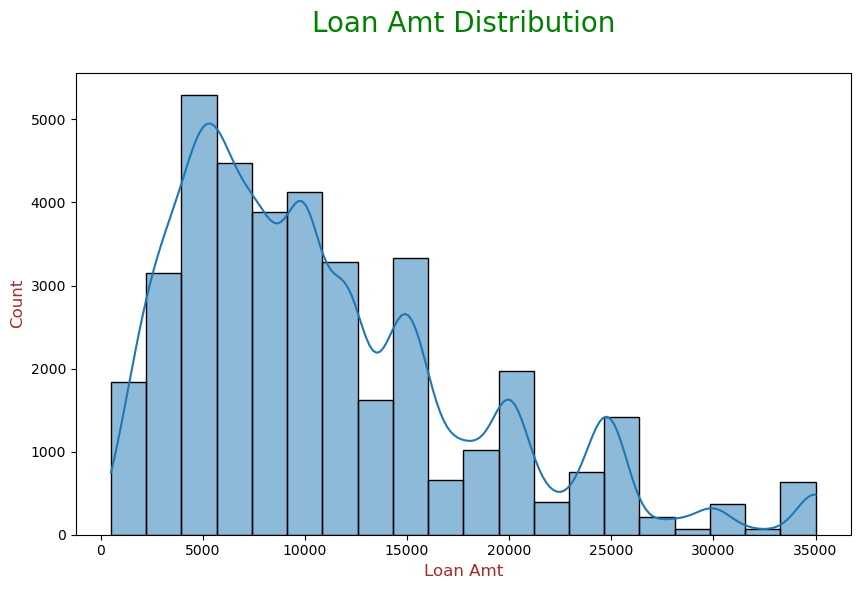

In [29]:
# Univariate for loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=load_df, x='loan_amnt', bins=20, kde=True)
plt.title('Loan Amt Distribution\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Loan Amt', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Count', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

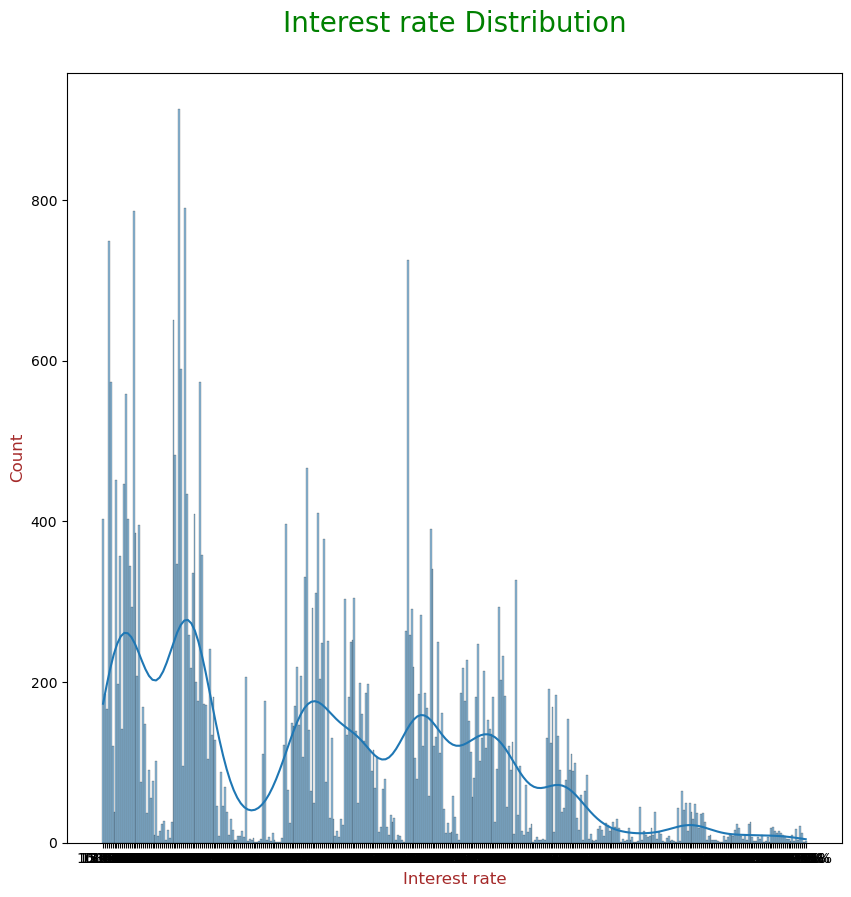

In [32]:
# Univariate for interest rate 
plt.figure(figsize=(10, 10))
sns.histplot(data=load_df, x='int_rate', bins=20, kde=True)
plt.title('Interest rate Distribution\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Interest rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Count', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

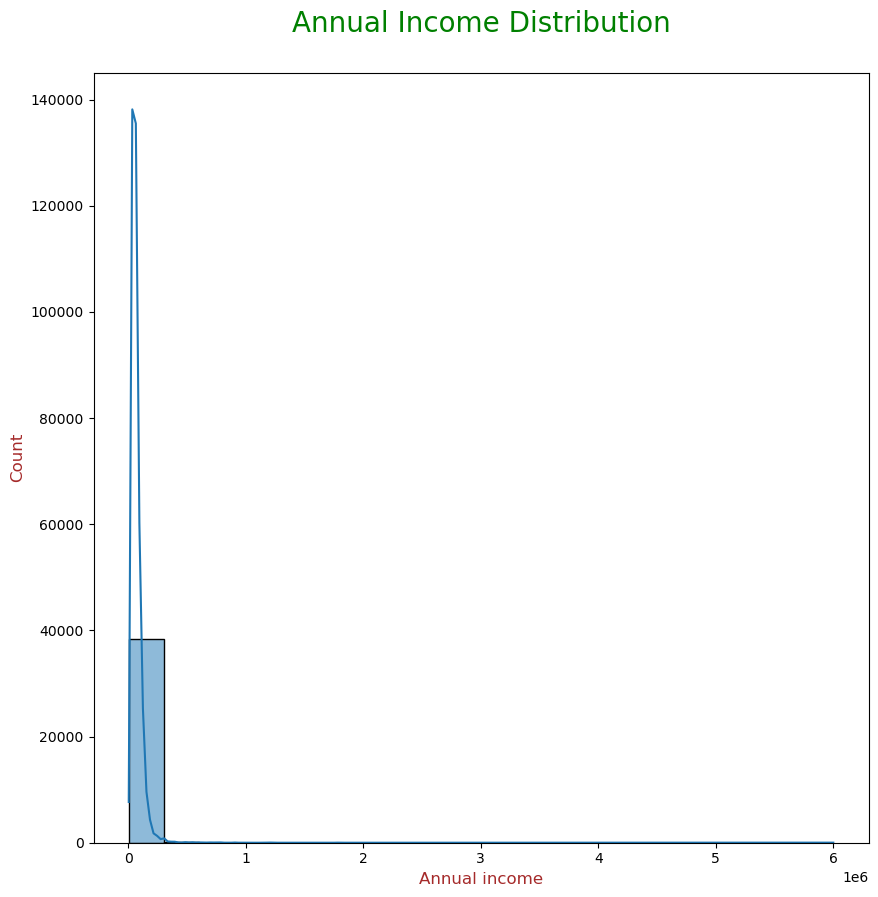

In [33]:
# Univariate for Annual Income
plt.figure(figsize=(10, 10))
sns.histplot(data=load_df, x='annual_inc', bins=20, kde=True)
plt.title('Annual Income Distribution\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Annual income', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Count', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

<Axes: >

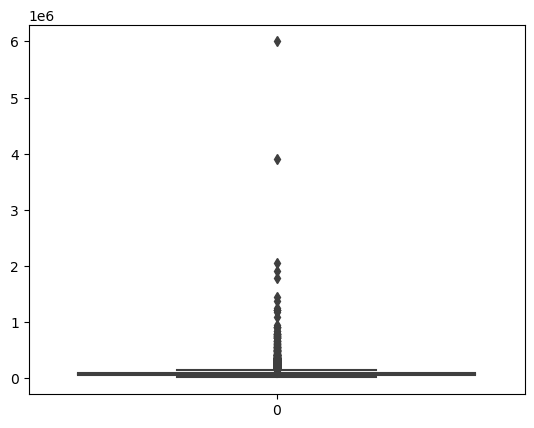

In [35]:
sns.boxplot(load_df['annual_inc'])

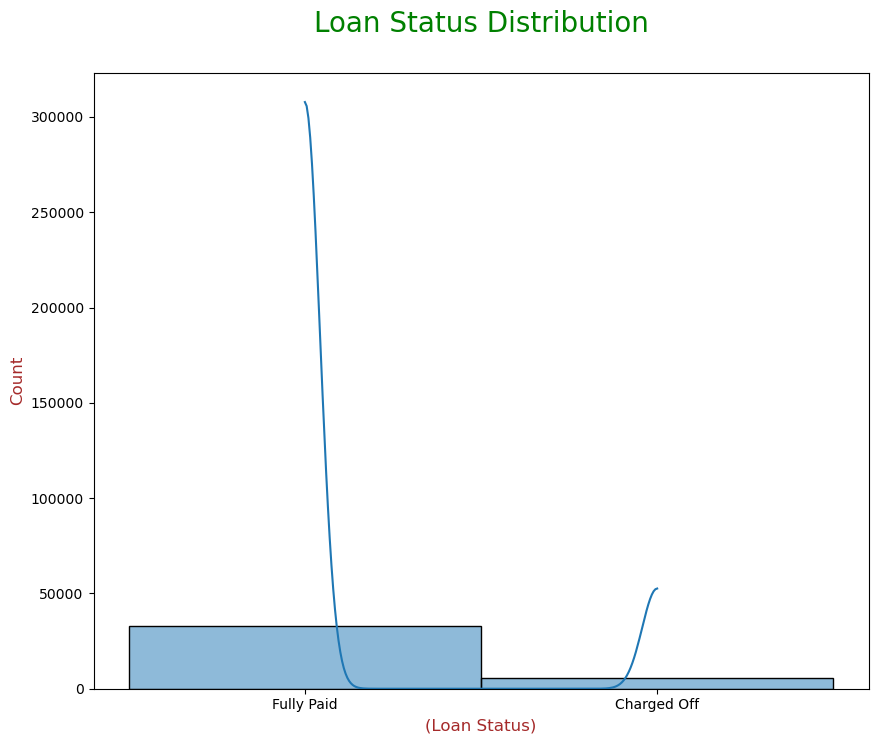

In [44]:
# Univariate for loan status
plt.figure(figsize=(10, 8))
sns.histplot(data=load_df, x='loan_status', bins=20, kde=True)
plt.title('Loan Status Distribution\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('(Loan Status)', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Count', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

## Bivariate Analysis

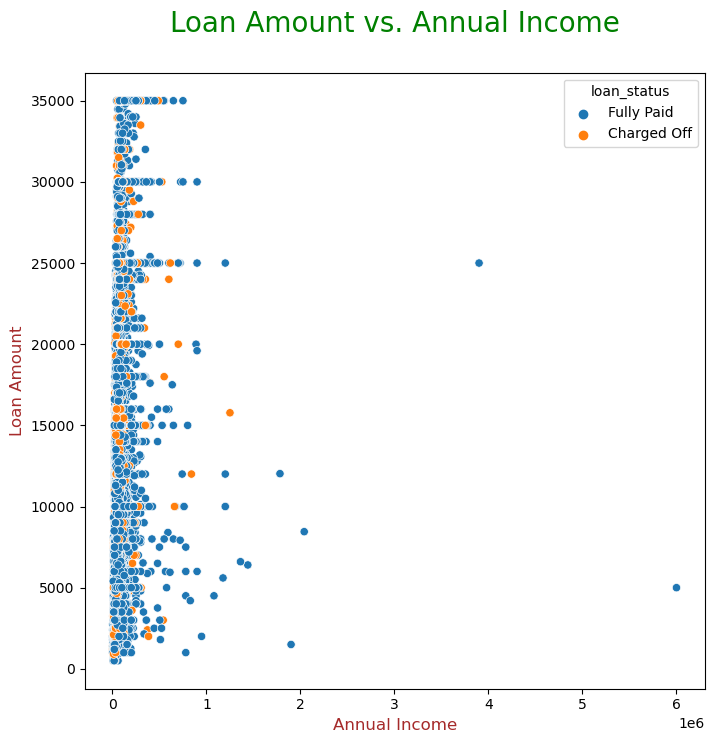

In [47]:
# bivariate for loan amount vs. annual income
plt.figure(figsize=(8, 8))
sns.scatterplot(data=load_df, x='annual_inc', y='loan_amnt', hue='loan_status')
plt.title('Loan Amount vs. Annual Income\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Annual Income', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Loan Amount', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

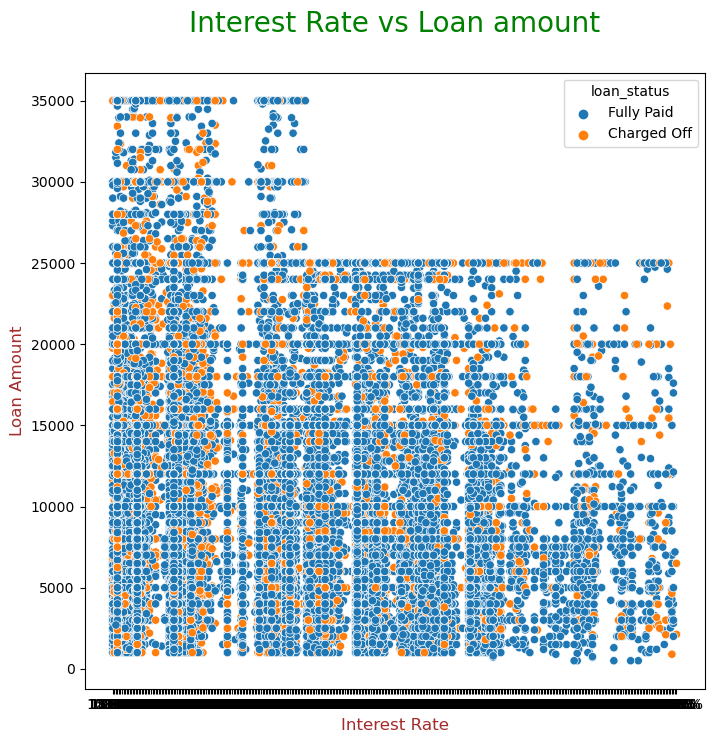

In [49]:
# Bivariate for loan amount vs. interest rate
plt.figure(figsize=(8, 8))
sns.scatterplot(data=load_df, x='int_rate', y='loan_amnt', hue='loan_status')
plt.title('Interest Rate vs Loan amount\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Interest Rate', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('Loan Amount', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

## Visualizing Categorical Data

<Axes: xlabel='loan_status', ylabel='count'>

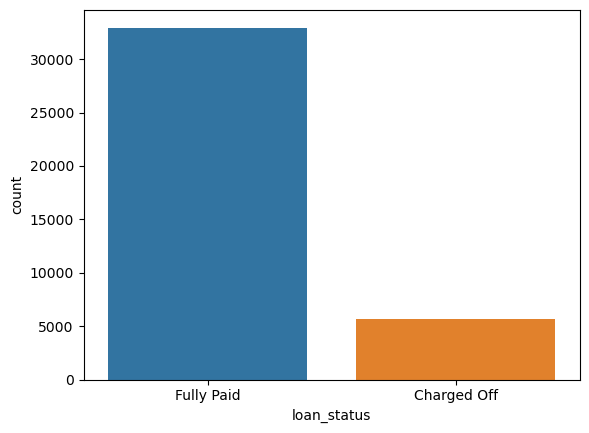

In [36]:
sns.countplot(x = 'loan_status', data = load_df)

<Axes: xlabel='grade', ylabel='count'>

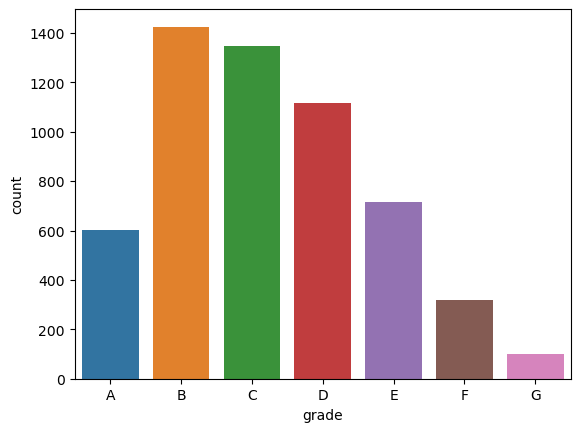

In [51]:
sns.countplot(x = 'grade', data = load_df[load_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

## Analyzing home_ownership

In [52]:
#checking unique values for home_ownership
load_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

### In Data Set there are only 3 records with 'NONE' value. So replacing it with 'OTHER'

In [54]:
#replacing 'NONE' with 'OTHERS'
load_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
load_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

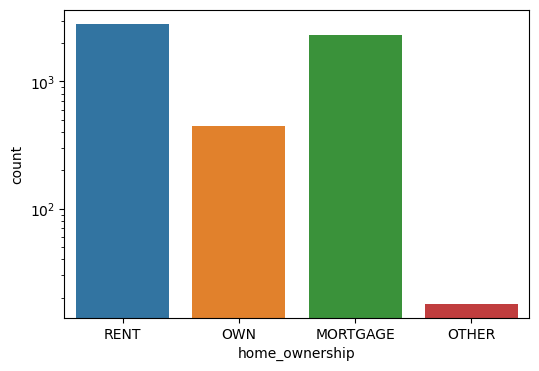

In [56]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=load_df[load_df['loan_status']=='Charged Off'])
plt.show()

### Analyzing purpose on loan

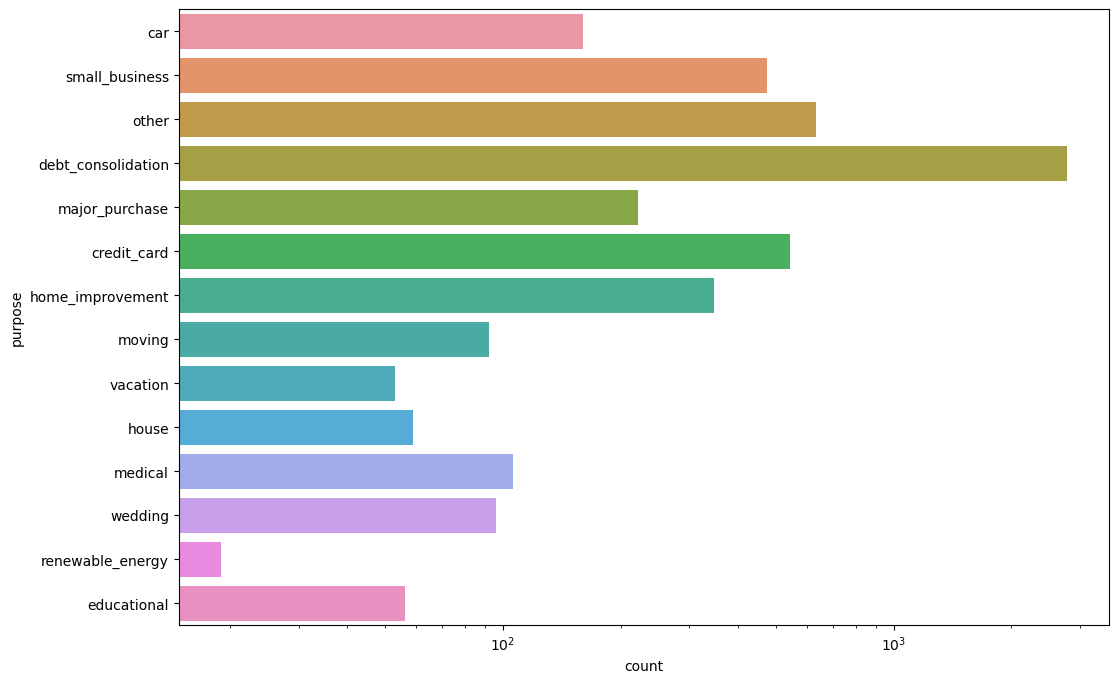

In [59]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=load_df[load_df.loan_status == 'Charged Off'])
plt.show()

### Analyzing interest rate wrt the emp_length


C:\Users\hp\AppData\Local\Temp\ipykernel_10212\2075175917.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


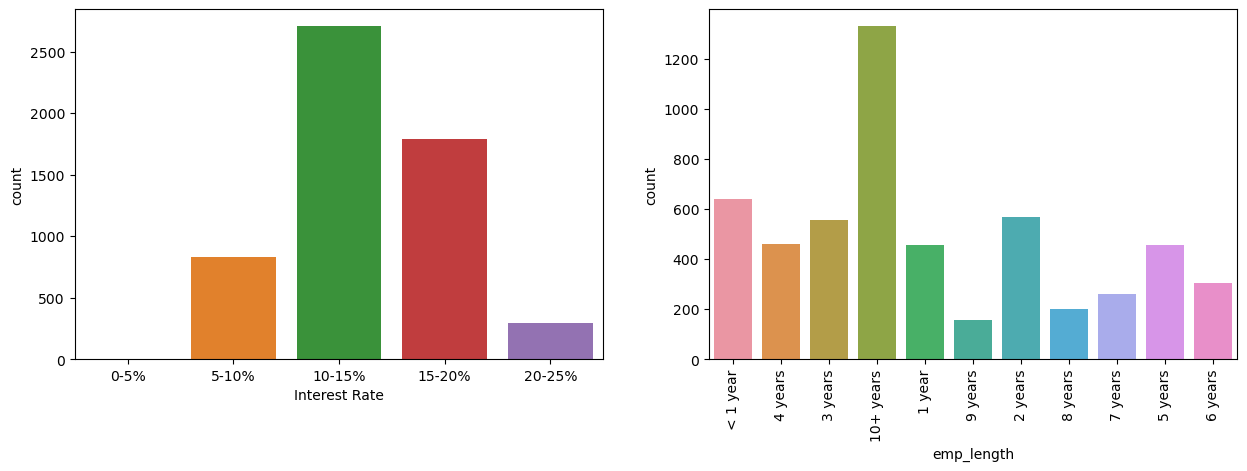

In [98]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=load_df[load_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=load_df[load_df.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

### Similarly analyzing annual_inc_groups, pub_rec, verifiction_status

Text(0.5, 0, 'Annual Income Groups')

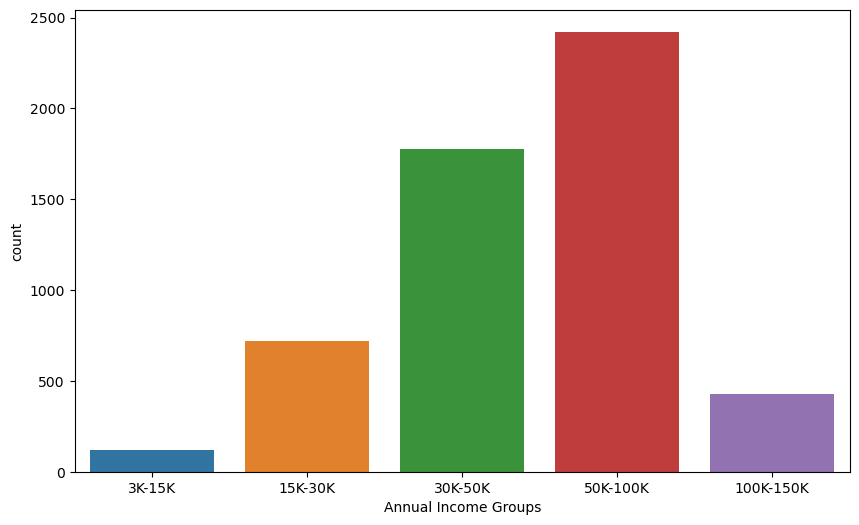

In [80]:
load_df['annual_inc_groups'] = pd.cut(load_df['annual_inc'], bins=[3000, 15000, 30000, 50000, 100000, 150000], labels=['3K-15K', '15K-30K', '30K-50K', '50K-100K', '100K-150K'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='annual_inc_groups', data=load_df[load_df['loan_status'] == 'Charged Off'])
plt.xlabel('Annual Income Groups')

<Axes: xlabel='count', ylabel='term'>

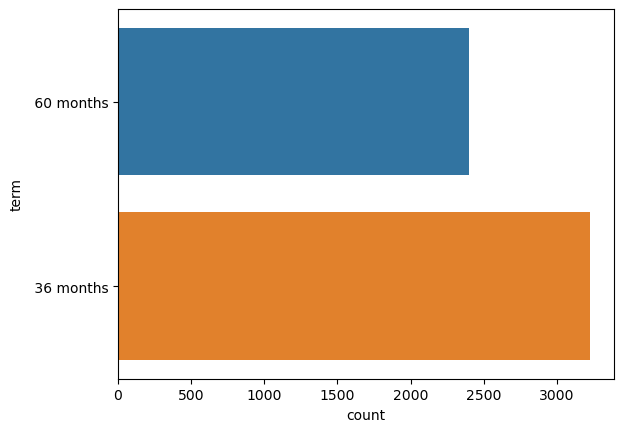

In [81]:
sns.countplot(y='term', data=load_df[load_df['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

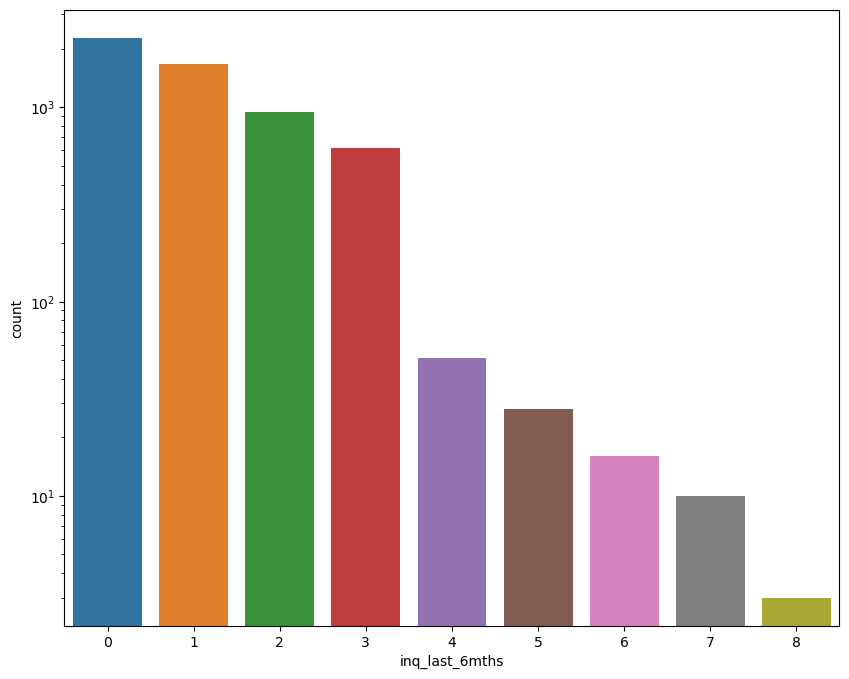

In [82]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=load_df[load_df['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

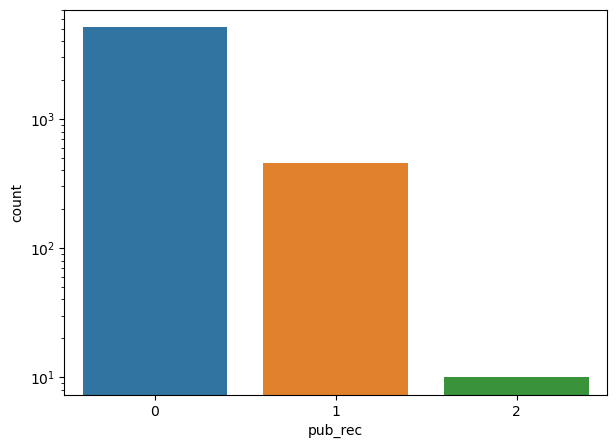

In [83]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=load_df[load_df['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

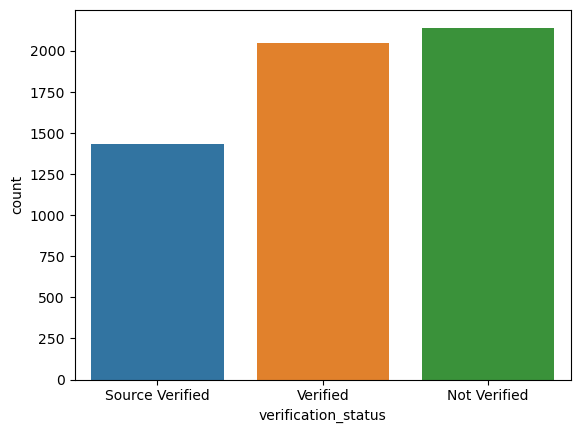

In [84]:
sns.countplot(x='verification_status', data=load_df[load_df['loan_status']=='Charged Off'])

## Analyzing by issued month and year

In [88]:
## Extracting month and year from colume Issue Date
df_month_year = load_df['issue_d'].str.partition("-", True)     
load_df['issue_month']=df_month_year[0]                       
load_df['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

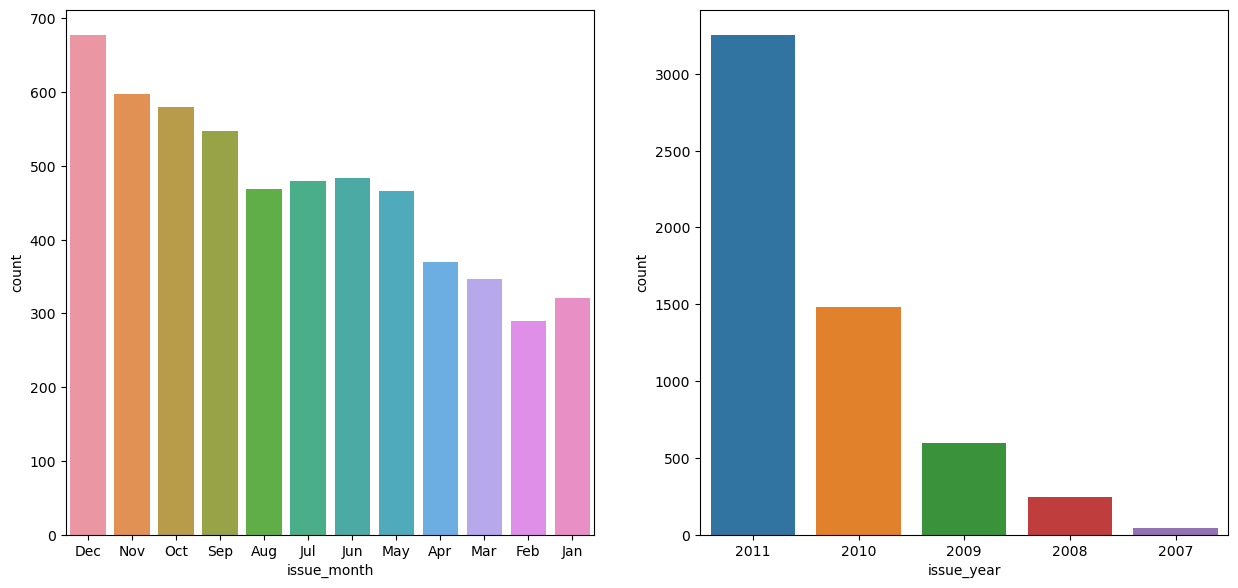

In [89]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=load_df[load_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=load_df[load_df['loan_status']=='Charged Off'])

### It is Observed that Maximum number of defaults occured when the loan was sanctioned/issued in Dec. & Loan issued in the year 2011.

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

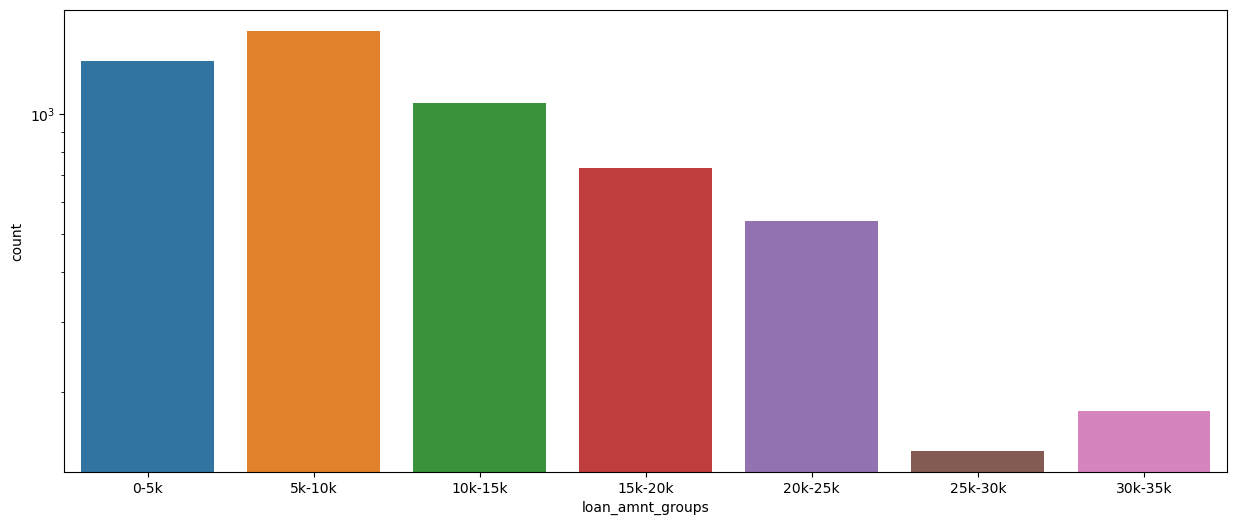

In [90]:
load_df['loan_amnt_groups'] = pd.cut(load_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=load_df[load_df['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

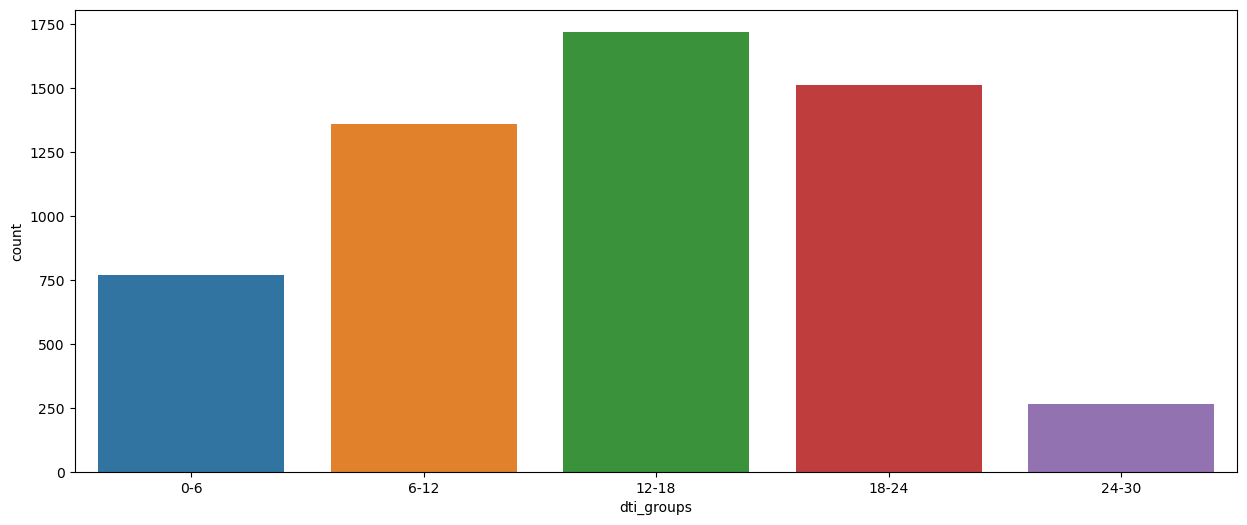

In [93]:
load_df['dti_groups'] = pd.cut(load_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x='dti_groups', data=load_df[load_df['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

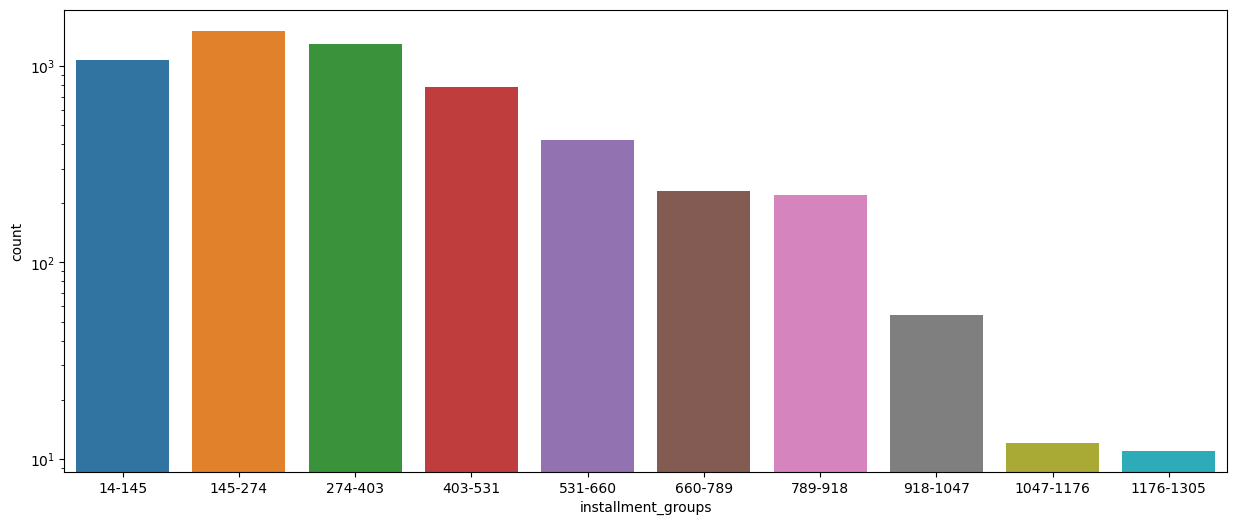

In [94]:
load_df['installment_groups'] = pd.cut(load_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=load_df[load_df['loan_status']=='Charged Off'])

# `Observations`

## <font color = green>The above analysis is with respect to the charged off loans for each variable suggests probability of defaulting when : </font> 

-  Applicants having house_ownership as 'RENT' are likely to default 
-  Applicants who use the loan to clear other debts
-  Applicants who has interest at the rate of 13-17% are likely to default
-  Applicants who have an income of range 31201 - 58402
-  Applicants with employement length of 10
-  Applicants who have taken loan for purpose debt_cosolidation are likely to default
-  when annual income is 50k - 100k are likely to default
-  Dti is between 12-18
-  When monthly installments are between 145-274
-  When employee working length is 10 years are likely to default
-  When the purpose is 'debt_consolidation'
-  When loan amount is between 5k - 10k are likely to default